In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# Лабараторная 1.1 

## чтение файла

In [ ]:
def read_data(filename):
    return pd.read_csv(filename)

filename = 'student_scores.csv' 
data = read_data(filename)

## статистическая информация

In [17]:
def show_statistics(data, x_col, y_col):
    stats = {
        'Количество': [len(data[x_col]), len(data[y_col])],
        'Минимальное значение': [data[x_col].min(), data[y_col].min()],
        'Максимальное значение': [data[x_col].max(), data[y_col].max()],
        'Среднее значение': [data[x_col].mean(), data[y_col].mean()],
        'Стандартное отклонение': [data[x_col].std(), data[y_col].std()]
    }
    
    return pd.DataFrame(stats, index=[x_col, y_col])

x_col = 'Hours'
y_col = 'Scores'

stats = show_statistics(data, x_col, y_col)
display(stats)

,Количество,Минимальное значение,Максимальное значение,Среднее значение,Стандартное отклонение
Hours,25,1.1,9.2,5.012,2.525094
Scores,25,17.0,95.0,51.480,25.286887


## изображение исходных точек

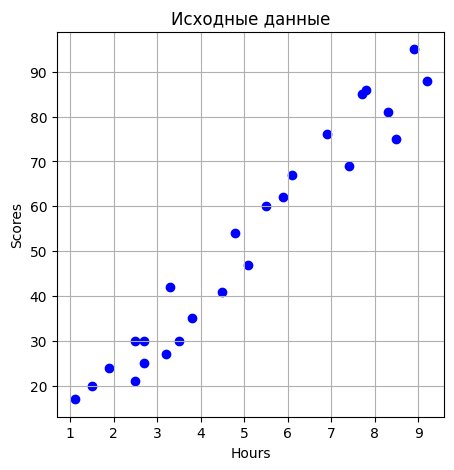

In [31]:
def plot_original_data(data, x_col, y_col, ax):
    ax.scatter(data[x_col], data[y_col], color='blue')
    ax.set_title('Исходные данные')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

fig, (ax1) = plt.subplots(1, figsize=(5, 5))
plot_original_data(data, x_col, y_col, ax1)

## параметры регрессионной прямой

In [24]:
def linear_regression(data, x_col, y_col):
    x = data[x_col]
    y = data[y_col]
    
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x * y)
    sum_x2 = sum(x ** 2)
    
    a = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)
    b = (sum_y - a * sum_x) / n
    
    return a, b

a, b = linear_regression(data, x_col, y_col)
print(f"\nУравнение регрессионной прямой: y = {a:.2f}x + {b:.2f}")


Уравнение регрессионной прямой: y = 9.78x + 2.48


## изображение прямой

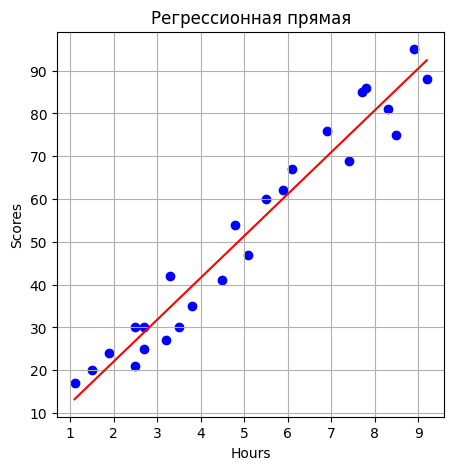

In [32]:
def plot_regression_line(data, x_col, y_col, a, b, ax):
    ax.scatter(data[x_col], data[y_col], color='blue')
    
    x_values = np.linspace(data[x_col].min(), data[x_col].max(), 100)
    y_values = a * x_values + b
    ax.plot(x_values, y_values, color='red')
    
    ax.set_title('Регрессионная прямая')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

fig, (ax2) = plt.subplots(1, figsize=(5, 5))
plot_regression_line(data, x_col, y_col, a, b, ax2)

## квадраты ошибок

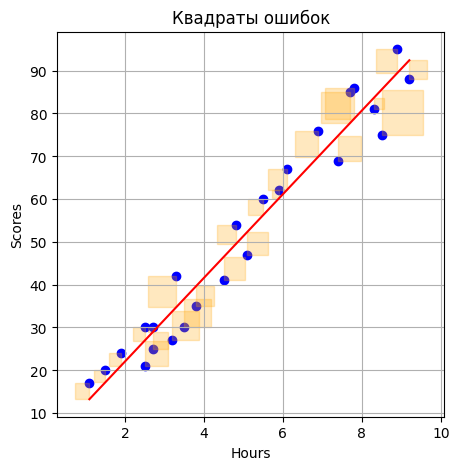

In [ ]:
def plot_error_squares(data, x_col, y_col, a, b, ax):
    ax.scatter(data[x_col], data[y_col], color='blue')
    
    x_values = np.linspace(data[x_col].min(), data[x_col].max(), 100)
    y_values = a * x_values + b
    ax.plot(x_values, y_values, color='red')
    
    transform_width = 1/10 
    
    for xi, yi in zip(data[x_col], data[y_col]):
        y_pred = a * xi + b
        error = y_pred - yi 
        width = error * transform_width
        height = error
        
        if error > 0:
            rect = Rectangle((xi, yi), width, height, 
                           edgecolor='orange', facecolor='orange', alpha=0.25)
        else:
            rect = Rectangle((xi, yi + height), width, -height, 
                           edgecolor='orange', facecolor='orange', alpha=0.25)
        ax.add_patch(rect)
    
    ax.set_title('Квадраты ошибок')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

fig, (ax3) = plt.subplots(1, figsize=(5, 5))
plot_error_squares(data, x_col, y_col, a, b, ax3)

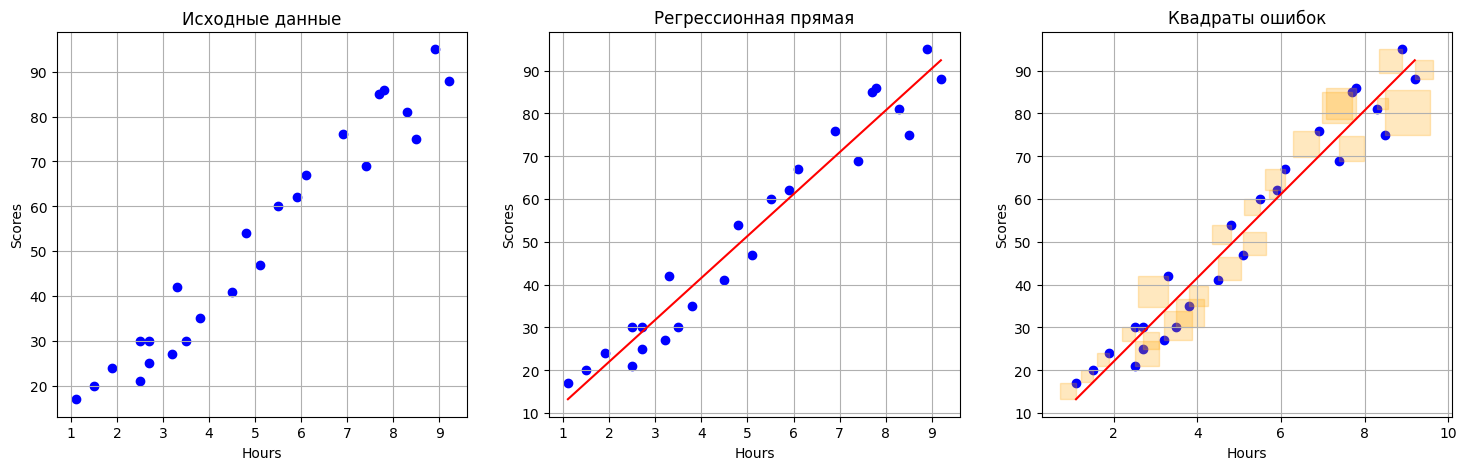

In [44]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

plot_original_data(data, x_col, y_col, ax1)
plot_regression_line(data, x_col, y_col, a, b, ax2)
plot_error_squares(data, x_col, y_col, a, b, ax3)

# Лабараторная 1.2